In [2]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import skimage.transform as tfm
import sys

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
def distance(a, b):
    return np.abs(a-b)

def region_growing_average(img, img_t, tolerance, seed):
    
    #img_t = np.zeros(img.shape)
    x = int(seed[0]); y = int(seed[1])

    img_t[x, y] = 1
    
    avg = np.mean(img[np.where(img_t==1)])
    
    # check matrix border and conquering criterion for the 4-neigbourhood
    if (y+1 < img.shape[1] and img_t[x,y+1] == 0 and distance(avg, img[x, y+1]) <= tolerance):
        region_growing_average(img, img_t, tolerance, [x, y+1])
        
    if (y-1 >= 0 and img_t[x,y-1] == 0  and distance(avg, img[x, y-1]) <= tolerance):
        region_growing_average(img, img_t, tolerance, [x, y-1])
        
    if (x+1 < img.shape[0] and img_t[x+1,y] == 0  and distance(avg, img[x+1, y]) <= tolerance):
        region_growing_average(img, img_t, tolerance, [x+1, y])
        
    if (x-1 >= 0 and img_t[x-1,y] == 0  and distance(avg, img[x-1, y]) <= tolerance):
        region_growing_average(img, img_t, tolerance, [x-1, y])
        
    #return img_t

In [5]:
def normalize_minmax(f, factor):
    f_min = np.min(f)
    f_max = np.max(f)
    f = (f - f_min)/(f_max-f_min)
    return (f*factor)

def Luminance(img):
    img = np.array(img, copy=True).astype(float)
    # computing conversion
    new_img = np.zeros((img.shape[0], img.shape[1]))
    new_img = img[:,:,0]*0.299 + img[:,:,1]*0.587 + img[:,:,2]*0.114
    new_img = normalize_minmax(new_img, 255)
    
    return new_img

(-0.5, 959.5, 1279.5, -0.5)

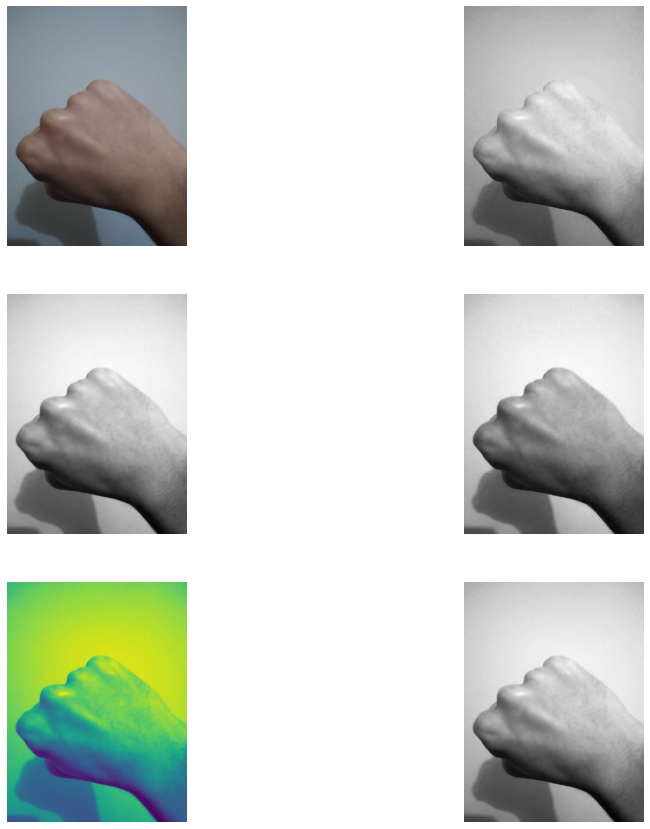

In [6]:
img = imageio.imread("/content/drive/Shared drives/Equipe amigos/2020.1/PDI/Rock_v1.jpg")

plt.figure(figsize=(15,15))
plt.subplot(321); plt.imshow(img); plt.axis('off')
plt.subplot(322); plt.imshow(img[:,:,0], cmap="gray"); plt.axis('off')
plt.subplot(323); plt.imshow(img[:,:,1], cmap="gray"); plt.axis('off')
plt.subplot(324); plt.imshow(img[:,:,2], cmap="gray"); plt.axis('off')
plt.subplot(325); plt.imshow(Luminance(img)); plt.axis('off')
plt.subplot(326); plt.imshow(Luminance(img), cmap="gray"); plt.axis('off')

(160, 120)


(-0.5, 119.5, 159.5, -0.5)

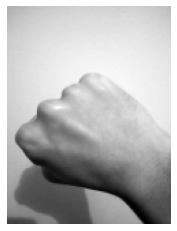

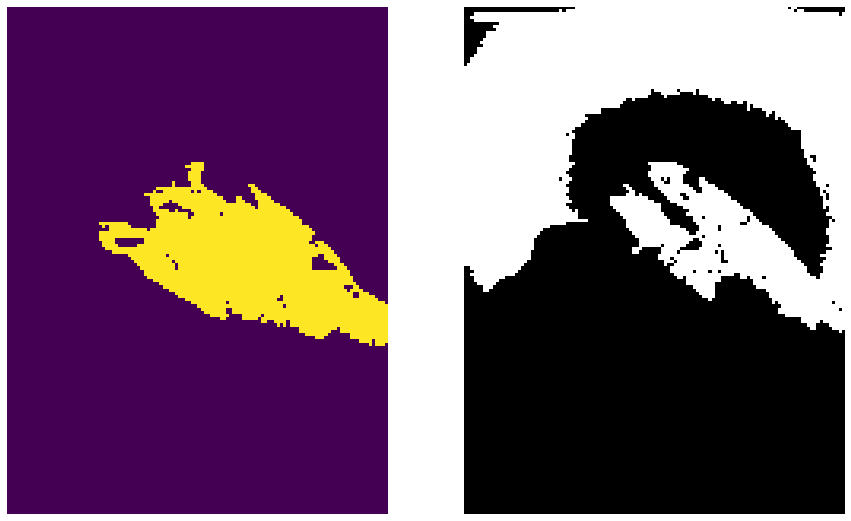

In [13]:
gray_img = Luminance(img)

gray_img = tfm.downscale_local_mean(gray_img, (8, 8))
#imageio.imwrite("/content/drive/Shared drives/Equipe amigos/2020.1/PDI/Rock_blackWhite.jpg", gray_img)

print(gray_img.shape)
plt.imshow(gray_img, cmap="gray"); plt.axis('off')

processed_img1 = np.zeros(gray_img.shape)
processed_img2 = np.zeros(gray_img.shape)

#sys.setrecursionlimit(30000)

region_growing_average(gray_img, processed_img1, 16, [gray_img.shape[0]/2, gray_img.shape[1]/2])
region_growing_average(gray_img, processed_img2, 16, [3,3])

plt.figure(figsize=(15,15))
plt.subplot(121); plt.imshow(processed_img1); plt.axis('off')
plt.subplot(122); plt.imshow(processed_img2, cmap="gray"); plt.axis('off')